In [0]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

## Critical paths example

Arcs 1 through 9 with lengths $X_j \sim Exp(\lambda_j)$ for $j = 1, \ldots, 9$.


In [0]:
arc_length_means = [1, 2, 2, 3, 3, 1, 2, 1, 3]

In [0]:
## IID samples

n = 1000 # number of observations
critical_path_length = np.zeros(n)

for i in range(n):
    U = np.random.rand(9)
    X = -1.0*(arc_length_means*np.log(U))
    path_1_length = X[0] + X[1] + X[3] + X[6] + X[8] # X1 + X2 + X4 + X7 + X9
    path_2_length = X[0] + X[1] + X[4] + X[7] + X[8] # X1 + X2 + X5 + X8 + X9
    path_3_length = X[0] + X[2] + X[5] + X[7] + X[8] # X1 + X3 + X6 + X8 + X9
    critical_path_length[i] = np.max([path_1_length, path_2_length, path_3_length])

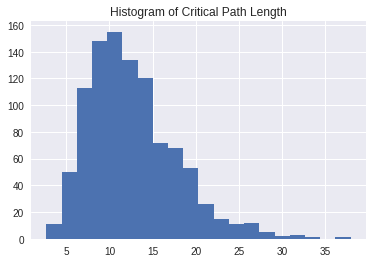

In [26]:
plt.hist(critical_path_length, bins = 20);
plt.title("Histogram of Critical Path Length");

In [27]:
cp_mean = np.mean(critical_path_length)
cp_std = np.std(critical_path_length, ddof=1)

print("Based on 1000 iid observations:")
print("Mean = ", cp_mean)
print("Std Dev =", cp_std)
print("Half width =", 1.96*cp_std/np.sqrt(n))
print("CI = (", cp_mean - 1.96*cp_std/np.sqrt(n), ",", cp_mean + 1.96*cp_std/np.sqrt(n), ")")

Based on 1000 iid observations:
Mean =  12.62695426671386
Std Dev = 5.110124128349783
Half width = 0.31672877488665147
CI = ( 12.310225491827207 , 12.943683041600512 )


In [0]:
## Antithetic variates (w/ same # of inversions)

n = 500 # number of observations (now divided by 2)
critical_path_length = np.zeros(n)

for i in range(n):
    U = np.random.rand(9)
    X = -1.0*(arc_length_means*np.log(U))
    path_1_length = X[0] + X[1] + X[3] + X[6] + X[8] # X1 + X2 + X4 + X7 + X9
    path_2_length = X[0] + X[1] + X[4] + X[7] + X[8] # X1 + X2 + X5 + X8 + X9
    path_3_length = X[0] + X[2] + X[5] + X[7] + X[8] # X1 + X3 + X6 + X8 + X9
    critical_path_length_original = np.max([path_1_length, path_2_length, path_3_length])
    
    X_anti = -1.0*(arc_length_means*np.log(1-U))
    path_1_length_anti = X_anti[0] + X_anti[1] + X_anti[3] + X_anti[6] + X_anti[8] # X1 + X2 + X4 + X7 + X9
    path_2_length_anti = X_anti[0] + X_anti[1] + X_anti[4] + X_anti[7] + X_anti[8] # X1 + X2 + X5 + X8 + X9
    path_3_length_anti = X_anti[0] + X_anti[2] + X_anti[5] + X_anti[7] + X_anti[8] # X1 + X3 + X6 + X8 + X9
    critical_path_length_anti = np.max([path_1_length_anti, path_2_length_anti, path_3_length_anti])

    # Average the two critical path length estimates
    critical_path_length[i] = (critical_path_length_original + critical_path_length_anti)/2

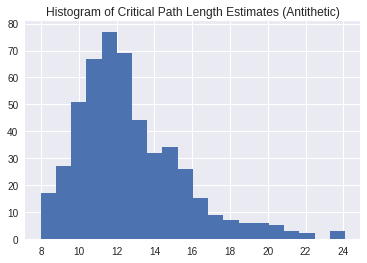

In [29]:
plt.hist(critical_path_length, bins = 20);
plt.title("Histogram of Critical Path Length Estimates (Antithetic)");

In [30]:
cp_mean = np.mean(critical_path_length)
cp_std = np.std(critical_path_length, ddof=1)

print("Mean = ", cp_mean)
print("Std Dev =", cp_std)
print("Half width =", 1.96*cp_std/np.sqrt(n))
print("CI = (", cp_mean - 1.96*cp_std/np.sqrt(n), ",", cp_mean + 1.96*cp_std/np.sqrt(n), ")")

Mean =  12.713547798765504
Std Dev = 2.8237933251225
Half width = 0.2475163981118557
CI = ( 12.466031400653648 , 12.96106419687736 )


## Option pricing example

In [0]:
# Parameters

T = 0.25 # 3 months (1/4 year) # expiration time
N = 40 # number of monitoring dates
Delta = T/N # time step

K = 40 # strike price

sigma = 0.3 # volatility
r = 0.05 # risk free rate
mu = r - (sigma**2)/2

In [0]:
## IID paths

n = 1000 # number of paths to simulate

disc_payoff = np.zeros(n)
for j in range(n):
    Y = np.zeros(N+1)
    Y[0] = 50 # initial price

    # underlying N(0,1) rvs
    xi = np.random.normal(loc=0, scale=1, size=N)

    for i in range(1, N+1):
        Y[i] = Y[i-1]*np.exp(mu*Delta + sigma*np.sqrt(Delta)*xi[i-1])
    
    path_mean = np.mean(Y[:N+1])
    disc_payoff[j] = np.exp(-r*T)*np.max([path_mean - K, 0])

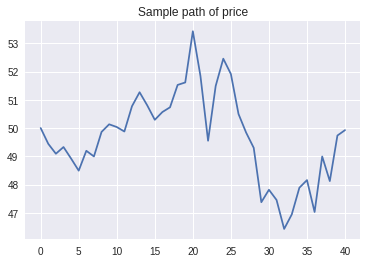

In [47]:
plt.plot(Y);
plt.title("Sample path of price");

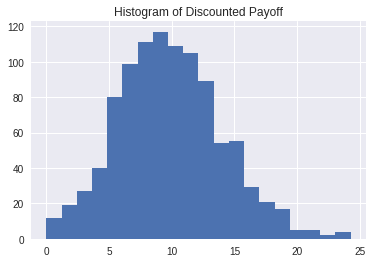

In [48]:
plt.hist(disc_payoff, bins = 20);
plt.title("Histogram of Discounted Payoff");

In [49]:
dp_mean = np.mean(disc_payoff)
dp_std = np.std(disc_payoff, ddof=1)

print("Mean = ", dp_mean)
print("Std Dev =", dp_std)
print("Half width =", 1.96*dp_std/np.sqrt(n))
print("CI = (", dp_mean - 1.96*dp_std/np.sqrt(n), ",", dp_mean + 1.96*dp_std/np.sqrt(n), ")")

Mean =  9.902902051870468
Std Dev = 4.181292390870897
Half width = 0.2591591873583482
CI = ( 9.64374286451212 , 10.162061239228816 )


In [0]:
## Antithetic IID paths
n = 500 # number of paths to simulate

disc_payoff_regular = np.zeros(n)
disc_payoff_anti = np.zeros(n)
disc_payoff = np.zeros(n)

for j in range(n):
    Y = np.zeros(N+1)
    Y[0] = 50 # initial price
    
    Y_anti = np.zeros(N+1)
    Y_anti[0] = 50 # initial price

    # underlying N(0,1) rvs
    xi = np.random.normal(loc=0, scale=1, size=N)
    xi_anti = -xi

    for i in range(1, N+1):
        Y[i] = Y[i-1]*np.exp(mu*Delta + sigma*np.sqrt(Delta)*xi[i-1])
        Y_anti[i] = Y_anti[i-1]*np.exp(mu*Delta + sigma*np.sqrt(Delta)*xi_anti[i-1])
    
    path_mean = np.mean(Y[:N+1])
    disc_payoff_regular[j] = np.exp(-r*T)*np.max([path_mean - K, 0])
    path_mean_anti = np.mean(Y_anti[:N+1])
    disc_payoff_anti[j] = np.exp(-r*T)*np.max([path_mean_anti - K, 0])
    disc_payoff[j] = (disc_payoff_regular[j] + disc_payoff_anti[j])/2

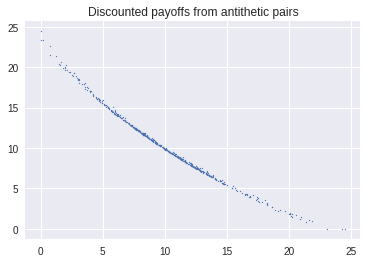

In [54]:
plt.scatter(disc_payoff_regular, disc_payoff_anti, s=1);
plt.title("Discounted payoffs from antithetic pairs");

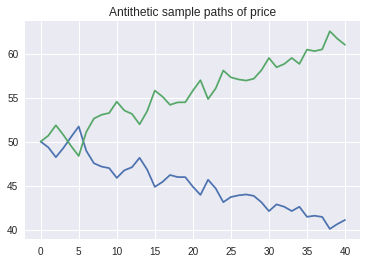

In [53]:
plt.plot(Y);
plt.plot(Y_anti)
plt.title("Antithetic sample paths of price");

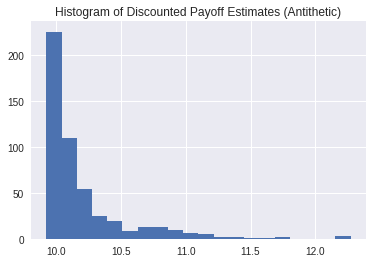

In [55]:
plt.hist(disc_payoff, bins = 20);
plt.title("Histogram of Discounted Payoff Estimates (Antithetic)");

In [56]:
dp_mean = np.mean(disc_payoff)
dp_std = np.std(disc_payoff, ddof=1)

print("Mean = ", dp_mean)
print("Std Dev =", dp_std)
print("Half width =", 1.96*dp_std/np.sqrt(n))
print("CI = (", dp_mean - 1.96*dp_std/np.sqrt(n), ",", dp_mean + 1.96*dp_std/np.sqrt(n), ")")

Mean =  10.195418319586395
Std Dev = 0.3531007979675206
Half width = 0.030950649576859987
CI = ( 10.164467670009534 , 10.226368969163255 )
